# Flight Arrival and Departure Data Exploration
## by Lucas Amaro de Oliveira

## Preliminary Wrangling

This document explores the data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

%matplotlib inline

In [2]:
flights_2007_df = pd.read_csv('./Data/2007.csv')

In [3]:
flights_2007_df.drop(columns={'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'TaxiIn', 'TaxiOut'}, inplace=True)

In [4]:
print(flights_2007_df.shape)
print('\n')
print(flights_2007_df.info())
print('\n')
print(flights_2007_df.count())
print('\n')
flights_2007_df.head(5)

(7453215, 22)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 22 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  Distance           int64  
 14  Cancelled          int64  
 15  CancellationCode   object 
 16  Diverted           int64  
 17  CarrierDelay       int64  
 18  WeatherDelay       int64  
 19  NASDelay           int64  
 20  SecurityDelay      int64  
 21  LateAircraftDelay  int64  
dtypes: float64(4), int64(15), object(3)
memory usage: 1.2+ GB
None


Year                 7453215
Mont

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,CRSElapsedTime,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,75.0,389,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,90.0,479,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,90.0,479,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,90.0,479,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,90.0,479,0,NaN,0,0,0,0,0,0


In [5]:
flights_2007_df.rename(columns={'Year':'year',
                                'Month':'month',
                                'DayofMonth':'day',
                                'DayOfWeek':'day_of_week',
                                'DepTime':'actual_departure_time',
                                'CRSDepTime':'scheduled_departure_time',
                                'ArrTime':'actual_arrival_time',
                                'CRSArrTime':'scheduled_arrival_time',
                                'UniqueCarrier':'carrier',
                                'FlightNum':'flight_number',
                                'TailNum':'tail_number',
                                'ActualElapsedTime':'actual_elapsed_time',
                                'CRSElapsedTime':'scheduled_elapsed_time',
                                'AirTime':'air_time',
                                'ArrDelay':'arrival_delay',
                                'DepDelay':'departure_delay',
                                'Origin':'origin',
                                'Dest':'destination',
                                'Distance':'distance',
                                'TaxiIn':'taxi_in_time',
                                'TaxiOut':'taxi_out_time',
                                'Cancelled':'cancelled',
                                'CancellationCode':'cancellation_code',
                                'Diverted':'diverted',
                                'CarrierDelay':'carrier_delay',
                                'WeatherDelay':'weather_delay',
                                'NASDelay':'NAS_delay',
                                'SecurityDelay':'security_delay',
                                'LateAircraftDelay':'late_aircraft_delay',                              
                                }, inplace=True)

In [6]:
flights_2007_df.columns

Index(['year', 'month', 'day', 'day_of_week', 'actual_departure_time',
       'scheduled_departure_time', 'actual_arrival_time',
       'scheduled_arrival_time', 'carrier', 'flight_number', 'tail_number',
       'actual_elapsed_time', 'scheduled_elapsed_time', 'distance',
       'cancelled', 'cancellation_code', 'diverted', 'carrier_delay',
       'weather_delay', 'NAS_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [7]:
flights_2007_df['date'] = pd.to_datetime(flights_2007_df[['year','month','day']])
flights_2007_df.date.head(3)

0   2007-01-01
1   2007-01-01
2   2007-01-01
Name: date, dtype: datetime64[ns]

In [8]:
flights_2007_df.drop(columns=['year','month','day','day_of_week'],inplace=True)

In [9]:
def to_4_digits(x):
    if x==x:
        x='{:04d}'.format(x)
        return x

In [10]:
flights_2007_df.scheduled_departure_time = pd.to_datetime(flights_2007_df.scheduled_departure_time.apply(to_4_digits), format ='%H%M', errors='coerce')
flights_2007_df.scheduled_arrival_time = pd.to_datetime(flights_2007_df.scheduled_arrival_time.apply(to_4_digits), format ='%H%M', errors='coerce')

print(flights_2007_df.scheduled_departure_time.head(3))
print(flights_2007_df.scheduled_arrival_time.head(3))

0   1900-01-01 12:25:00
1   1900-01-01 19:05:00
2   1900-01-01 21:30:00
Name: scheduled_departure_time, dtype: datetime64[ns]
0   1900-01-01 13:40:00
1   1900-01-01 20:35:00
2   1900-01-01 23:00:00
Name: scheduled_arrival_time, dtype: datetime64[ns]


In [11]:
def get_first_2_digits(x):
    if x==x:
        x='{:06.1f}'.format(x)
        return int(x[:2])

In [12]:
def get_last_digits(x):
    if x==x:
        x='{:06.1f}'.format(x)
        return float(x[2:])

In [13]:
values = flights_2007_df.actual_departure_time
flights_2007_df.actual_departure_time = pd.to_datetime(values.apply(get_first_2_digits), unit ='h') + pd.to_timedelta(values.apply(get_last_digits), unit='minute')

values = flights_2007_df.actual_arrival_time
flights_2007_df.actual_arrival_time = pd.to_datetime(values.apply(get_first_2_digits), unit ='h') + pd.to_timedelta(values.apply(get_last_digits), unit='minute')

print(flights_2007_df.actual_departure_time.head(3))
print(flights_2007_df.actual_arrival_time.head(3))

0   1970-01-01 12:32:00
1   1970-01-01 19:18:00
2   1970-01-01 22:06:00
Name: actual_departure_time, dtype: datetime64[ns]
0   1970-01-01 13:41:00
1   1970-01-01 20:43:00
2   1970-01-01 23:34:00
Name: actual_arrival_time, dtype: datetime64[ns]


In [14]:
flights_2007_df.replace(to_replace={'cancellation_code':['A','B','C','D']},value={'cancellation_code':['carrier', 'weather', 'NAS', 'security']},inplace=True)
flights_2007_df.cancellation_code.unique()

array([nan, 'carrier', 'weather', 'NAS', 'security'], dtype=object)

### What is the structure of your dataset?

There are 7453215 flights in the dataset with 29 features (year, month, day, day of the week, actual departure time, scheduled departure time, actual arrival time, scheduled arrival time, carrier, flight number, tail number, actual elapsed time,  scheduled elapsed time, air time, arrival delay, departure delay, origin, destination, distance, taxi-in time, taxi-out time, cancelled, cancellation code, diverted, carrier delay, weather delay, NAS delay, security delay, late aircraft delay).

### What is/are the main feature(s) of interest in your dataset?

I'm interested in finding out which features have the most influence on flight delay and cancellation.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

month, day of week, 
distance, scheduled departure time
cancelled, cancellation code,
carrier delay, weather delay, NAS delay, security delay, late aircraft delay

## Univariate Exploration

First, let's look at the flight distribution over the months.

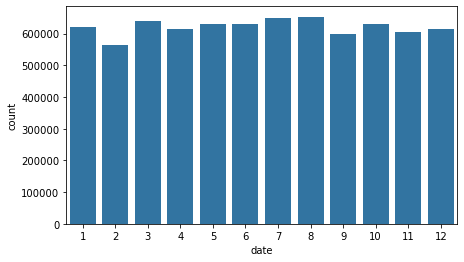

In [15]:
plt.figure(figsize=(7,4))
color = sns.color_palette()[0]
sns.countplot(x=flights_2007_df.date.dt.month, color=color);

The flights look evenly distributed over the months. More even than I expected.

Next, let's look at the flights' distribution over the days of the week.

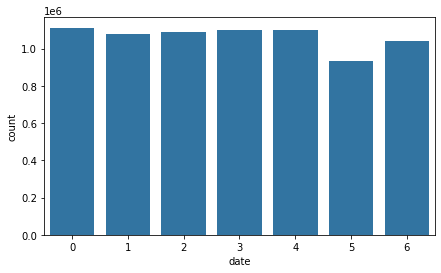

In [16]:
plt.figure(figsize=(7,4))
color = sns.color_palette()[0]
sns.countplot(x=flights_2007_df.date.dt.dayofweek, color=color);

The flights look evenly distributed during weekdays. At the weekends there is a small decrease in the flight counts.

Now, let's look at the flights' distribution over the time of the day. I will plot both 'scheduled_departure_time' and 'scheduled_arrival_time'.

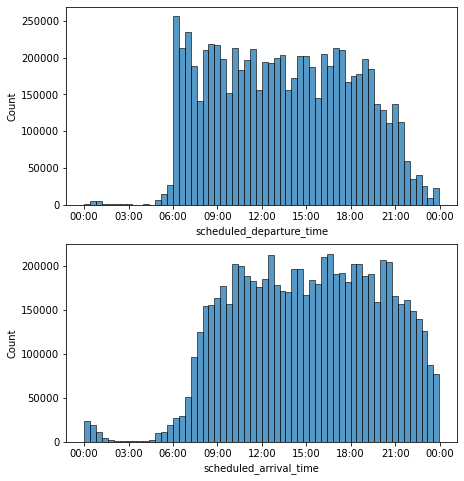

In [17]:
plt.figure(figsize=(7,8))
plt.subplot(2,1,1)
g = sns.histplot(data=flights_2007_df, x='scheduled_departure_time', bins=60);
myFmt = mdates.DateFormatter('%H:%M')
g.xaxis.set_major_formatter(myFmt)

plt.subplot(2,1,2)
g = sns.histplot(data=flights_2007_df, x='scheduled_arrival_time', bins=60);
myFmt = mdates.DateFormatter('%H:%M')
g.xaxis.set_major_formatter(myFmt);

The bulk of the flights' departure starts at 6:00 and goes up to 22:00. There are lots of peaks and valleys indicating some type of rounding or inefficient scheduling. The hights peak is at 6:00. In the arrival distribution, it is incredible that difference between the counts just before and just after midnight. There is a big effort to make the fights arrive on the same day of the departure.

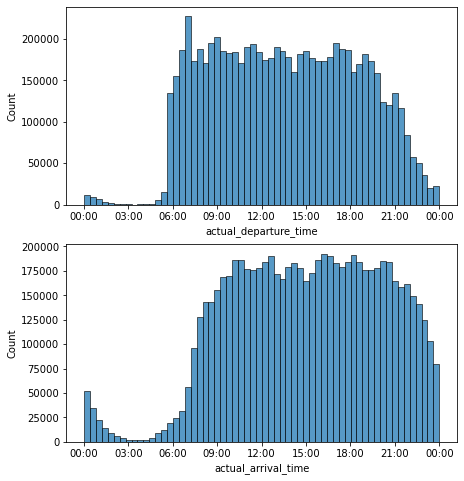

In [18]:
plt.figure(figsize=(7,8))
plt.subplot(2,1,1)
g = sns.histplot(data=flights_2007_df, x='actual_departure_time', bins=60);
myFmt = mdates.DateFormatter('%H:%M')
g.xaxis.set_major_formatter(myFmt)

plt.subplot(2,1,2)
g = sns.histplot(data=flights_2007_df, x='actual_arrival_time', bins=60);
myFmt = mdates.DateFormatter('%H:%M')
g.xaxis.set_major_formatter(myFmt);

The actual departure presents a smoother distribution compared with schedule one. The early and late departure brings the peaks from the schedules distribution down. There are much more arrival flights between 0h and 3h than what was the schedule. This indicates that the schedule was quite optimistic.

Now, let's take a look at the scheduled elapsed time

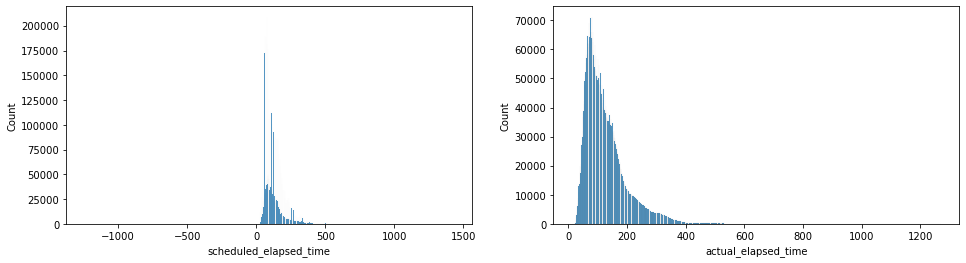

In [19]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
g = sns.histplot(data=flights_2007_df, x='scheduled_elapsed_time');

plt.subplot(1,2,2)
g = sns.histplot(data=flights_2007_df, x='actual_elapsed_time');

In [20]:
flights_2007_df.query('scheduled_elapsed_time < 0').scheduled_elapsed_time

566619    -1240.0
1538199     -46.0
Name: scheduled_elapsed_time, dtype: float64

In [21]:
flights_2007_df.query('scheduled_elapsed_time > 500').scheduled_elapsed_time

224391     546.0
224392     546.0
224393     546.0
224394     546.0
224395     546.0
           ...  
7451254    512.0
7452238    523.0
7452239    596.0
7452617    599.0
7452626    512.0
Name: scheduled_elapsed_time, Length: 11216, dtype: float64

There are two negative elapsed times, and the distribution is very skewed to the right with 11216 values over 500 min. Limiting the plot beteween 0 and 500 min, we have:

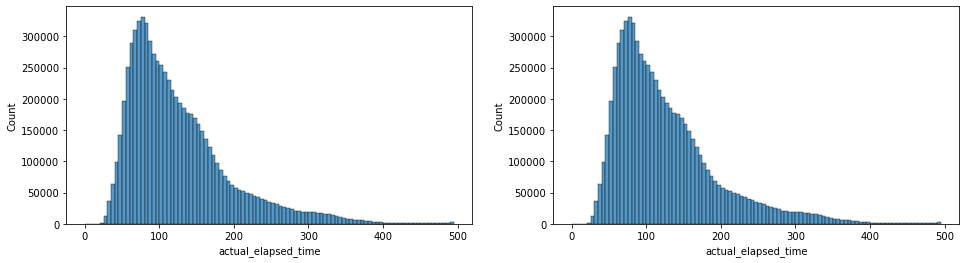

In [22]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
bins = np.arange(0,500,5)
g = sns.histplot(data=flights_2007_df, x='actual_elapsed_time', bins=bins);

plt.subplot(1,2,2)
g = sns.histplot(data=flights_2007_df, x='actual_elapsed_time', bins=bins);

We can spect a similar behaviour for the distance variable. Let see if this assumption is correct.

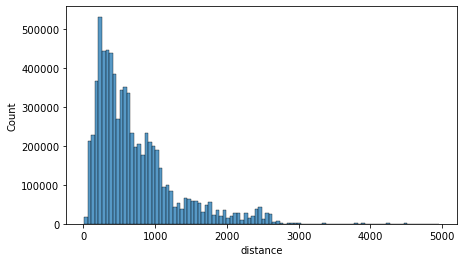

In [23]:
plt.figure(figsize=(7,4))
g = sns.histplot(data=flights_2007_df, x='distance', bins=100);

In [24]:
flights_2007_df.query('distance > 3000').scheduled_elapsed_time

224391     546.0
224392     546.0
224393     546.0
224394     546.0
224395     546.0
           ...  
7451254    512.0
7452238    523.0
7452239    596.0
7452617    599.0
7452626    512.0
Name: scheduled_elapsed_time, Length: 11229, dtype: float64

As expected, the distribution is skewed to the right. There is no negative value, a first glance this data is more reliable than the data from scheduled_elapsed_time variable.

What is the most recurrent reason to cancel a flight? Let's see!

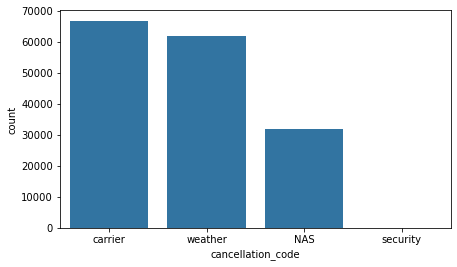

In [25]:
plt.figure(figsize=(7,4))
color = sns.color_palette()[0]
g = sns.countplot(data=flights_2007_df, x='cancellation_code', color=color);
g.set(xticklabels=['carrier', 'weather', 'NAS', 'security']);

Looks like the carriers are the most responsible for the delays. However, the weather is very close.

Let's check what carrier has the most flights.

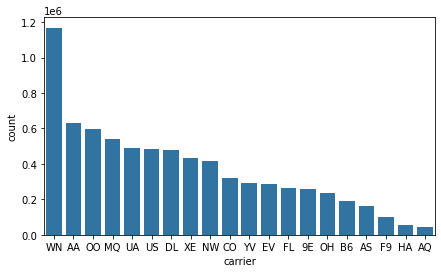

In [26]:
order = flights_2007_df.carrier.value_counts().index

plt.figure(figsize=(7,4))
color = sns.color_palette()[0]
g = sns.countplot(data=flights_2007_df, x='carrier', order=order, color=color);

The first place has almost twice the number of flights than the second carrier.

Now, let's look at the delays time. From carriers, weather, NAS, security, late aircraft, and total.

In [27]:
flights_2007_df['total_delay'] = flights_2007_df.carrier_delay + flights_2007_df.weather_delay + flights_2007_df.NAS_delay + flights_2007_df.security_delay + flights_2007_df.late_aircraft_delay

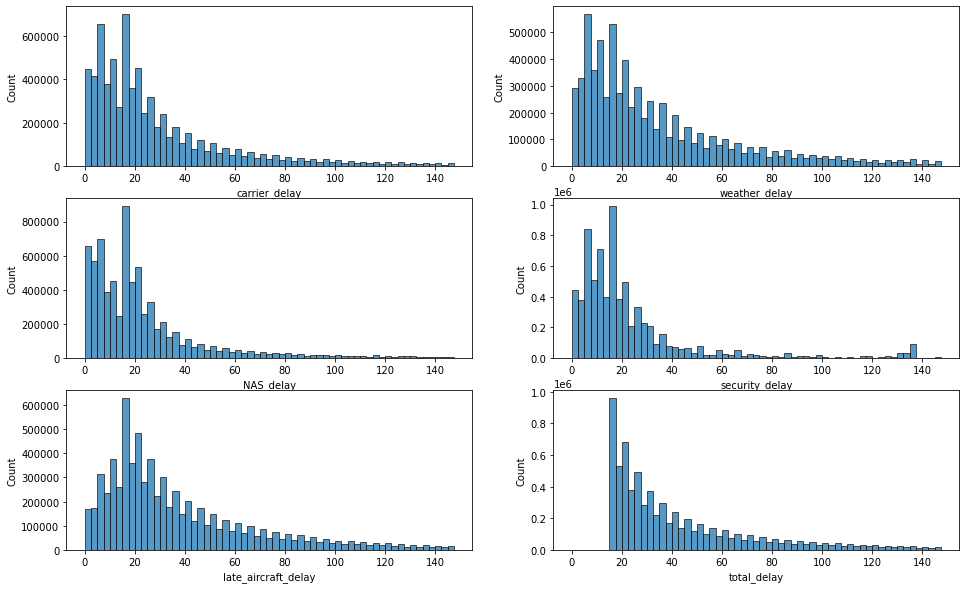

In [28]:
plt.figure(figsize=(16,10))
plt.subplot(3,2,1)
bins = np.arange(0,150,2.5)
g = sns.histplot(x=flights_2007_df.carrier_delay.replace(0,), bins=bins);

plt.subplot(3,2,2)
g = sns.histplot(x=flights_2007_df.weather_delay.replace(0,), bins=bins);

plt.subplot(3,2,3)
g = sns.histplot(x=flights_2007_df.NAS_delay.replace(0,), bins=bins);

plt.subplot(3,2,4)
g = sns.histplot(x=flights_2007_df.security_delay.replace(0,), bins=bins);

plt.subplot(3,2,5)
g = sns.histplot(x=flights_2007_df.late_aircraft_delay.replace(0,), bins=bins);

plt.subplot(3,2,6)
g = sns.histplot(x=flights_2007_df.total_delay.replace(0,), bins=bins);

In [29]:
flights_2007_df[flights_2007_df.total_delay>0].total_delay.describe()

count    1.803320e+06
mean     5.596937e+01
std      5.611987e+01
min      1.500000e+01
25%      2.300000e+01
50%      3.700000e+01
75%      6.800000e+01
max      2.598000e+03
Name: total_delay, dtype: float64

There are two peaks for each delay, at the beginning of the distribution and after 15min. That is because the minimum total delay recorded is 15.

Let's exam the proportion of delayed flights.

In [30]:
flights_2007_df[flights_2007_df.total_delay>0].total_delay.count()/flights_2007_df.total_delay.count()

0.2419519630119351

24.2% of flights presented some kind of delay in 2007.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Evaluating the delays I found out that the distribution is skewed to the right, much more then I expected. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the scheduled_elapsed_time variable was found negative times. I didn't perform any corretions.

## Bivariate Exploration

Let's exam the proportion of delayed or cancelled flights.

In [31]:
flights_2007_df.query('total_delay >0 or cancelled==1')['carrier'].count() / flights_2007_df['carrier'].count()

0.26351956840101887

26.3% of flights presented some kind of delay or was cancelled in 2007. Let's see how this change over the moths.

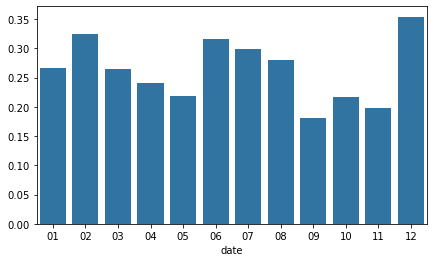

In [32]:
delay_by_month = flights_2007_df.query('total_delay >0 or cancelled==1').groupby(pd.Grouper(key='date', freq='M'))['carrier'].count() / flights_2007_df.groupby(pd.Grouper(key='date', freq='M'))['carrier'].count()
plt.figure(figsize=(7,4))
color = sns.color_palette()[0]
g = sns.barplot(x=delay_by_month.index, y=delay_by_month.values, color=color);
myFmt = mdates.DateFormatter('%d')
g.xaxis.set_major_formatter(myFmt);

In [33]:
delay_by_month[11]/delay_by_month[8]

1.9524459443486384

December has the highest proportion of delayed flights. June to August has also a high proportion of delayed flights.

Let's exam this behaviour over the day of week.

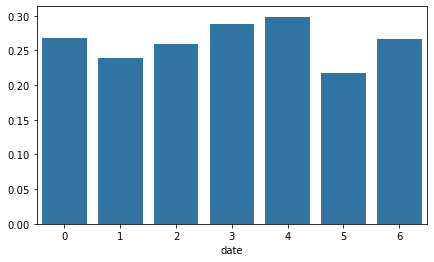

In [34]:
df = flights_2007_df.query('total_delay >0 or cancelled==1')
delay_by_day_of_week = df.groupby(df['date'].dt.weekday)['carrier'].count() / flights_2007_df.groupby(flights_2007_df['date'].dt.weekday)['carrier'].count()
plt.figure(figsize=(7,4))
color = sns.color_palette()[0]
g = sns.barplot(x=delay_by_day_of_week.index, y=delay_by_day_of_week.values, color=color);

Monday has a high proportion of the delayed flights. Tuesday presented a less proportion of delays which builds up until Friday. Saturday has the lowest proportion of delays, as is also the least busy day of the week. Sunday, despite bean less bused than the weekdays, has a high proportion of delays.

Let's look the behaviour over the time of the day.

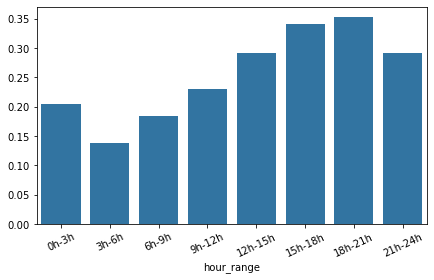

In [35]:
#Dividing the day in 8 parts of 3 hours each.
hour_edges = [0,3,6,9,12,15,18,21,24]
hour_lebals = ['0h-3h','3h-6h','6h-9h','9h-12h','12h-15h','15h-18h','18h-21h','21h-24h']
flights_2007_df['hour_range'] = pd.cut(flights_2007_df.scheduled_departure_time.dt.hour,hour_edges,labels=hour_lebals, include_lowest=True)

#computing the proportion of delayed fligths
delay_by_hour_range = flights_2007_df.query('total_delay >0 or cancelled==1').groupby('hour_range')['hour_range'].count() / flights_2007_df.groupby('hour_range')['hour_range'].count()
# delay_by_hour_range = delay_by_hour_range.sort_values(ascending=False)

#ploting
plt.figure(figsize=(7,4))
color = sns.color_palette()[0]
g = sns.barplot(x=delay_by_hour_range.index, y=delay_by_hour_range.values, color=color);
plt.xticks(rotation=25);

As the busy time starts at 6h, the delays start to build up until 21h. At this time, the proportion of the delay starts to decrease.

Let's look at each source of delays. The is carrier, weather, NAS_delay, security_delay, late_aircraft_delay.

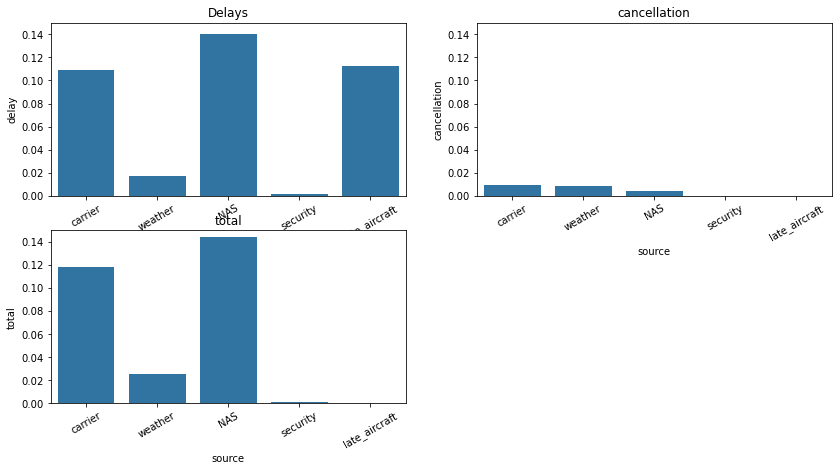

In [36]:
df = pd.DataFrame({'source':['carrier','weather','NAS','security','late_aircraft'],
                   'delay':
                   [(flights_2007_df.carrier_delay>0).sum() / flights_2007_df['carrier'].count(),
                   (flights_2007_df.weather_delay>0).sum() / flights_2007_df['carrier'].count(),
                   (flights_2007_df.NAS_delay>0).sum() / flights_2007_df['carrier'].count(),
                   (flights_2007_df.security_delay>0).sum() / flights_2007_df['carrier'].count(),
                   (flights_2007_df.late_aircraft_delay>0).sum() / flights_2007_df['carrier'].count()]})
df.set_index('source',inplace=True)


cancellations = flights_2007_df.cancellation_code.value_counts()/flights_2007_df['carrier'].count()
cancellations.index=['carrier', 'weather', 'NAS', 'security']
df=df.join(cancellations)
df.rename(columns={'cancellation_code':'cancellation'}, inplace=True)

df['total'] = df.delay+df.cancellation

plt.figure(figsize=(14,7))

plt.subplot(2,2,1)
color = sns.color_palette()[0]
g = sns.barplot(data=df, x=df.index, y='delay', color=color);
plt.xticks(rotation=30);
plt.title('Delays');
plt.ylim(0,.15);

plt.subplot(2,2,2)
color = sns.color_palette()[0]
g = sns.barplot(data=df, x=df.index, y='cancellation', color=color);
plt.xticks(rotation=30);
plt.title('cancellation');
plt.ylim(0,.15);

plt.subplot(2,2,3)
color = sns.color_palette()[0]
g = sns.barplot(data=df, x=df.index, y='total', color=color);
plt.xticks(rotation=30);
plt.title('total');
plt.ylim(0,.15);

The NAS presented to be the highest proportion of all source of delay, followed by carrier and late aircraft which presented very similar proportions. Wheather was surprised responsible for very few delays, which is weird since it was responsible for several cancellations. Security was responsible for either fewer delays.

Now, let's look at the delay proportion for each carrier. In this case, only the delay or cancellation caused by 'carrier' will be used.

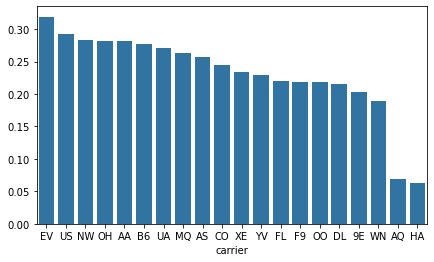

In [37]:
delay_by_carrier = flights_2007_df.query('total_delay >0 or cancellation_code=="A"').groupby('carrier')['carrier'].count() / flights_2007_df.groupby('carrier')['carrier'].count()
delay_by_carrier = delay_by_carrier.sort_values(ascending=False)

plt.figure(figsize=(7,4))
color = sns.color_palette()[0]
g = sns.barplot(x=delay_by_carrier.index, y=delay_by_carrier.values, color=color);

In [38]:
delay_by_carrier[0]/delay_by_carrier[-1]

5.076020128477208

The data is more unequally distributed as I expected. EV presented 5 times the delay or cancellation proportion of HA.

Let's look at the number of aircraft that flew for each carrier. Compared with the number of flights by each carrier previously discussed.

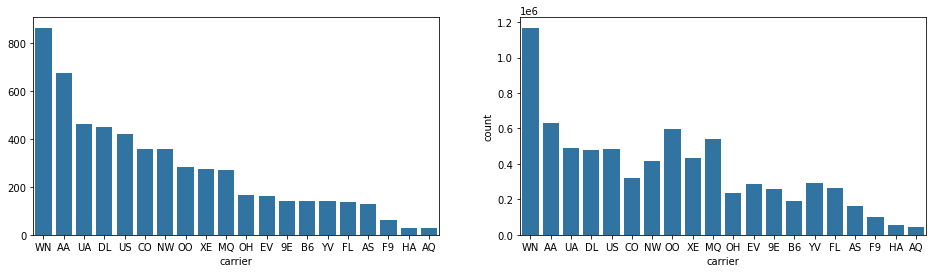

In [39]:
n_aircraft = flights_2007_df.groupby('carrier')['tail_number'].nunique()
n_aircraft = n_aircraft.sort_values(ascending=False)
order = n_aircraft.index.values

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
color = sns.color_palette()[0]
g = sns.barplot(x=n_aircraft.index, y=n_aircraft.values, order=order, color=color);


plt.subplot(1,2,2)
color = sns.color_palette()[0]
g = sns.countplot(data=flights_2007_df, x='carrier', order=order, color=color);

In [40]:
print('The higher number of aircraft over the lowest number of aircraft (WN/AQ): {:.1f}'.format(n_aircraft[0]/n_aircraft[-1]))
print('The higher number of flights over the lowest number of flights (WN/AQ) {:.1f}'.format(flights_2007_df.carrier.value_counts()[0]/flights_2007_df.carrier.value_counts()[-1]))

The higher number of aircraft over the lowest number of aircraft (WN/AQ): 32.0
The higher number of flights over the lowest number of flights (WN/AQ) 25.2


The number of aircraft is ever more unequally distributed than the number of flights. This suggests that carriers with less aircraft may be flighting shorter and more frequents routes, like OO and MQ.

let's look at the distance distribution over the carriers.

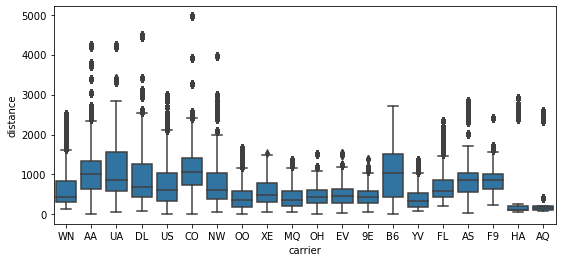

In [41]:
plt.figure(figsize=(9,4))
color = sns.color_palette()[0]

sns.boxplot(data=flights_2007_df,x='carrier', y='distance', color=color, order = order);

Definetly AQ is flighing shorterly than the most, as is HA, OO, and MQ. There is indeed tendency of carrier with more aircrafts flighing longer routes.

Now, let's look to which aircraft has the most delay.

In [42]:
tails_df = pd.DataFrame(flights_2007_df.tail_number.value_counts())
tails_df.rename(columns={'tail_number':'total_flights'}, inplace=True)
tails_df

,total_flights
0,105239
000000,11635
N655BR,4483
N479HA,4359
N651BR,4346
...,...
N78009,1
N78017,1
N576SK,1
N857NW,1


There are two values which are default typed '0', '000000'. Let's drop them.

In [43]:
tails_df.drop(['0','000000'], axis=0, inplace=True)
tails_df.head(3)

,total_flights
N655BR,4483
N479HA,4359
N651BR,4346


Now, computing the proportion of delayed flights.

In [44]:
delayed_flights_by_tail = flights_2007_df.query('total_delay >0 or cancelled==1').groupby('tail_number')['tail_number'].count() / flights_2007_df.groupby('tail_number')['tail_number'].count()
tails_df = tails_df.join(delayed_flights_by_tail)
tails_df.rename(columns={'tail_number':'delayed_flights'}, inplace=True)
tails_df.head()

,total_flights,delayed_flights
N655BR,4483,0.089003
N479HA,4359,0.021106
N651BR,4346,0.102853
N478HA,4316,0.024560
N654BR,4278,0.111501


In [45]:
tails_df.describe()

,total_flights,delayed_flights
count,5503.000000,5492.000000
mean,1333.149010,0.263361
std,688.771227,0.083976
min,1.000000,0.018941
25%,937.000000,0.216289
50%,1376.000000,0.262376
75%,1783.000000,0.300665
max,4483.000000,1.000000


Some tail numbers have 100% of delayed flights. Probably because it had only one flight which presented delayed. Let's select the aircraft that had at least 1000 flights.

In [46]:
tails_df=tails_df[tails_df['total_flights']>1000]

In [47]:
tails_df.describe()

,total_flights,delayed_flights
count,3958.000000,3958.000000
mean,1674.153866,0.256824
std,446.828917,0.057306
min,1001.000000,0.018941
25%,1333.000000,0.218442
50%,1640.000000,0.261573
75%,1946.000000,0.294598
max,4483.000000,0.477661


The quartiles didn't change much. But the max value was reduced to 42%.

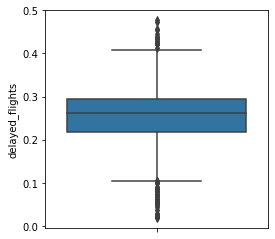

In [48]:
plt.figure(figsize=(4,4))
sns.boxplot(data= tails_df, y='delayed_flights');

Let's see the correlation between the percentage of delayed flights and the total number of flights for the aircraft.

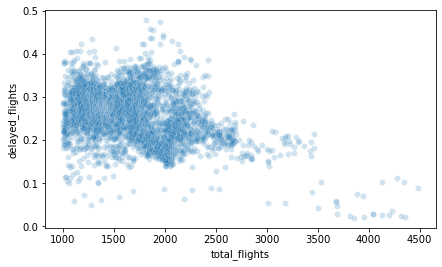

In [49]:
plt.figure(figsize=(7,4))
sns.scatterplot(data=tails_df, x='total_flights', y='delayed_flights', alpha=.2);

That was unexpected! The aircraft with the most number of flights in fact presented the lower proportion of delays or cancellation. I was expecting that the busiest ones have the most delays or cancellation.

Now let's see the correlation between the 'actual_elapsed_time' and the 'distance'

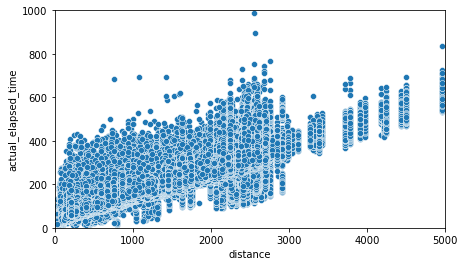

In [50]:
plt.figure(figsize=[7,4])
sns.scatterplot(data=flights_2007_df, x='distance', y='actual_elapsed_time');
plt.ylim(0,1000);
plt.xlim(0,5000);

Some of the shortest flight have very high elapsed time. Probably because of taxing and waiting.

Now, let's exam the proportion of delayed flights by flight distance, separating them into 10 equally sized bunch.

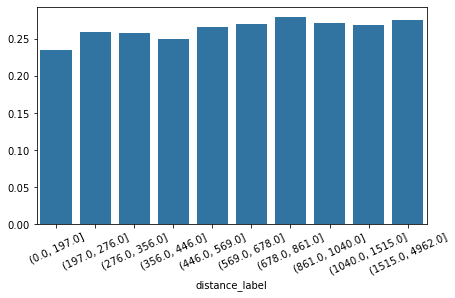

In [51]:
distance_edges = [flights_2007_df.distance.quantile(x) for x in np.arange(0,1.001,0.1)]
distance_edges[0] = 0
flights_2007_df['distance_label'] = pd.cut(flights_2007_df.distance, distance_edges)

delay_by_distance_label = flights_2007_df.query('total_delay >0 or cancelled==1').groupby('distance_label')['distance_label'].count() / flights_2007_df.groupby('distance_label')['distance_label'].count()
delay_by_distance_label = delay_by_distance_label.sort_values(ascending=False)

plt.figure(figsize=(7,4))
color = sns.color_palette()[0]
g = sns.barplot(x=delay_by_distance_label.index, y=delay_by_distance_label.values, color=color);
plt.xticks(rotation=25);

The proportion of delayed or cancelled flights were evenly distributed. With shorter flights presenting slighted fewer delays or cancellations, proportionally.

Let's see the distribution off all delays sources.

In [52]:
delay_sources = ['carrier_delay', 'weather_delay', 'NAS_delay', 'security_delay', 'late_aircraft_delay']

In [53]:
flights_melted= pd.melt(flights_2007_df[delay_sources].replace(0,), var_name='source', value_name='delay')

#dropping entries with no delays.
index_to_drop=flights_melted[flights_melted.delay==0].index.values
flights_melted.drop(index_to_drop, inplace=True)
flights_melted

,source,delay
2,carrier_delay,3
3,carrier_delay,23
4,carrier_delay,23
5,carrier_delay,23
6,carrier_delay,46
...,...,...
37266070,late_aircraft_delay,15
37266071,late_aircraft_delay,15
37266072,late_aircraft_delay,15
37266073,late_aircraft_delay,36


D:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


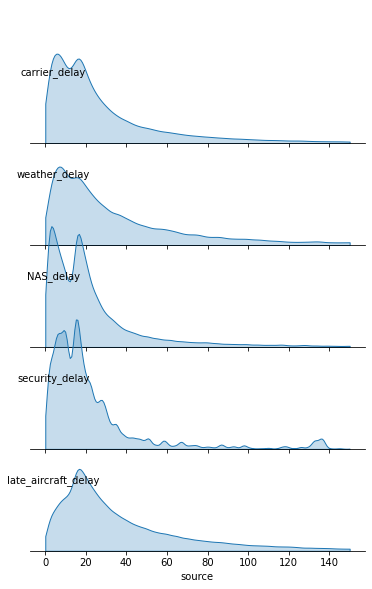

In [54]:
fig = sns.FacetGrid(data=flights_melted, row='source', height=2, aspect=3, gridspec_kws={'hspace':-0.25});
fig.map(sns.kdeplot, 'delay', shade=True, clip=(0.0, 150.0));

# remove the y-axes
fig.set(yticks=[]);
fig.despine(left=True);

# set the transparency of each subplot to full
fig.map(lambda **kwargs: plt.gca().patch.set_alpha(0))

# remove subplot titles and write in new labels
def label_text(x, **kwargs):
    plt.text(4, 0.02, x.iloc[0], ha = 'center', va = 'bottom');
fig.map(label_text, 'source');
# fig.set_xlabels('Combined fuel eff (mpg)');
fig.set_titles('');

There are two peaks, one around 5min and the other around 15 min. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Although the number of flights is evenly distributed over the month, the proportion of delayed flights are not. The proportion of delayed flights in December is 95% higher than in September.

The proportion of delayed or cancelled flights build up during the days, and, surprisingly, also during the week.

Contrary to what I expected, The aircraft that flew most frequently presented a lower proportion of delayed or cancelled flights.
In the same manner, lowes distance presented a lower proportion of delayed or cancelled flights.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Some carriers are specialized in shorter routes having a high number of flights per number of aircraft.

## Multivariate Exploration

Let's evaluate the proportion of delayed or cancelled flights over both day of the week and time of the day.

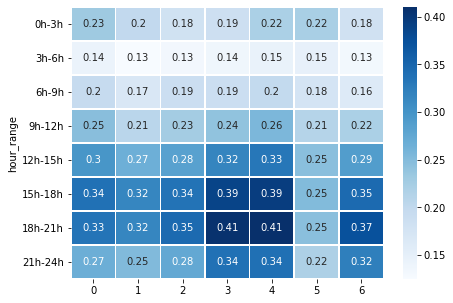

In [55]:
df=pd.DataFrame()
for day in np.arange(7):
    df1 = flights_2007_df[flights_2007_df['date'].dt.weekday==day]
    df2 = df1.query('total_delay >0 or cancelled==1')
    delay_by_hour_range = df2.groupby('hour_range')['hour_range'].count() / df1.groupby('hour_range')['hour_range'].count()
    df[day] = delay_by_hour_range
plt.figure(figsize=(7,5))
sns.heatmap(df, annot=True, linewidth=.5, cmap="Blues");

From 3:00 to 9:00 is the best time to fly with no more than 20% of delayed or cancelled flights. Next is between 9:00 and 12:00 and on Saturday with no more than 26% of cancelled or delayed flights. On Thursday and Friday between 18:00 and 21:00 we have the impressive value of 41% of cancellations or delays.

Previously, we evaluated the proportion of the delayed flights over a variable considering any source of delay. Now, let's evaluate them considering the source of delay separately. To do this, I will use a function that creates a small data frame containing the proportion of delayed flight for each source grouped by the chosen variable.

In [56]:
def delay_ratio_by_source(to_group, delay_sources):
    df = pd.DataFrame()
    for source in delay_sources:
        delayed_flight_counts = flights_2007_df.query('{}> 0 or cancellation_code=="{}"'.format(source,source[:-6])).groupby(to_group)['carrier'].count()
        total_flights_counts = flights_2007_df.groupby(to_group)['carrier'].count()
        df = df.append(pd.DataFrame({'source':source[:-6],'delay': delayed_flight_counts/total_flights_counts }))
    return df

first, let's evaluate the delays by the time of the day.

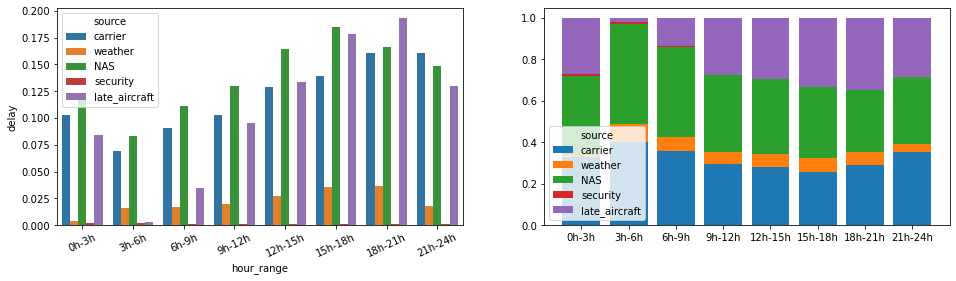

In [57]:
delay_sources = ['carrier_delay', 'weather_delay', 'NAS_delay', 'security_delay', 'late_aircraft_delay']
df2 = delay_ratio_by_source('hour_range', delay_sources)

plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.barplot(data=df2, x=df2.index, y='delay', hue='source');
plt.xticks(rotation=25);


plt.subplot(1,2,2)
total_per_hour = []
for hour_lebal in hour_lebals:
    total_per_hour.append(df2.loc[hour_lebal,'delay'].sum())

baselines = np.zeros(len(hour_lebals))
# for each second-variable category:
for i in range(len(delay_sources)):
    # isolate the counts of the first category,
    cat2 = delay_sources[i]
    ratio = df2[df2['source'] == cat2[:-6]]['delay']/total_per_hour
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(hour_lebals)), height = ratio,
            bottom = baselines)
    baselines += ratio

plt.xticks(np.arange(len(hour_lebals)), hour_lebals);
plt.legend([source[:-6] for source in delay_sources],title='source');

As the day goes on, flight late aircraft delays become more and more frequent. As this source of delay is probably derived from another one. Let's evaluate the same plot without this source.

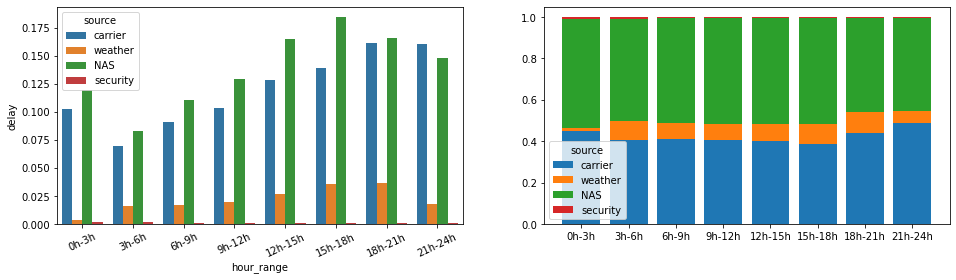

In [58]:
delay_sources = ['carrier_delay', 'weather_delay', 'NAS_delay', 'security_delay']
df2 = delay_ratio_by_source('hour_range', delay_sources)

plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.barplot(data=df2, x=df2.index, y='delay', hue='source');
plt.xticks(rotation=25);


plt.subplot(1,2,2)
total_per_hour = []
for hour_lebal in hour_lebals:
    total_per_hour.append(df2.loc[hour_lebal,'delay'].sum())
    
baselines = np.zeros(len(hour_lebals))
# for each second-variable category:
for i in range(len(delay_sources)):
    # isolate the counts of the first category,
    cat2 = delay_sources[i]
    ratio = df2[df2['source'] == cat2[:-6]]['delay']/total_per_hour
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(hour_lebals)), height = ratio,
            bottom = baselines)
    baselines += ratio

plt.xticks(np.arange(len(hour_lebals)), hour_lebals);
plt.legend([source[:-6] for source in delay_sources], title='source');

Looks liked weather delay is more common in the late afternoon and evenings. The NAS delay is lower than the carrier for most of the day, except between 21:00 and 24:00.

Now, lets look the behaviour over the moths.

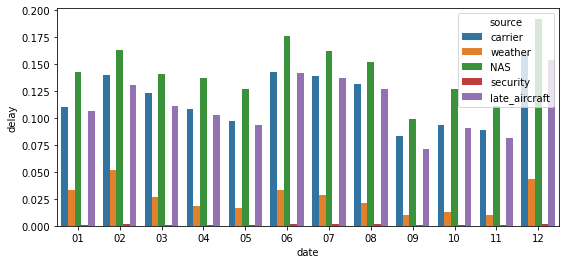

In [59]:
delay_sources = ['carrier_delay', 'weather_delay', 'NAS_delay', 'security_delay', 'late_aircraft_delay']
df = delay_ratio_by_source(pd.Grouper(key='date', freq='M'), delay_sources)


plt.figure(figsize=(9,4))
g= sns.barplot(data=df, x=df.index, y='delay', hue='source');
myFmt = mdates.DateFormatter('%d')
g.xaxis.set_major_formatter(myFmt);

Looks like June, July, December, January and February have the most weather delays proportionally.

Now, let's look at how each change accordingly with the day of the week.

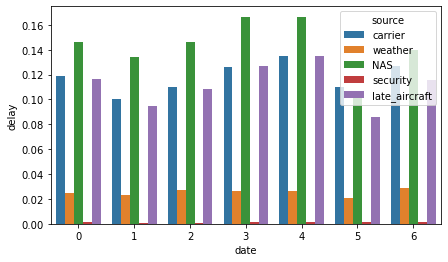

In [60]:
delay_sources = ['carrier_delay', 'weather_delay', 'NAS_delay', 'security_delay', 'late_aircraft_delay']

df = pd.DataFrame()
for source in delay_sources:
    df2 = flights_2007_df.query('{}> 0 or cancellation_code=="{}"'.format(source,source[:-6]))
    delayed_flight_counts = df2.groupby(df2['date'].dt.weekday)['carrier'].count()
    total_flights_counts = flights_2007_df.groupby(flights_2007_df['date'].dt.weekday)['carrier'].count()
    df = df.append(pd.DataFrame({'source':source[:-6],'delay': delayed_flight_counts/total_flights_counts }))


plt.figure(figsize=(7,4))
sns.barplot(data=df, x=df.index, y='delay', hue='source');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Yes, the time of the day and the day of the week can lead to very high delays.

### Were there any interesting or surprising interactions between features?

On Thursday and Friday between 18:00 and 21:00 we have the impressive value of 41% of cancellations or delays.